#STATISTICS Analysis



In [ ]:
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
from matplotlib import pyplot as plt
import random
import io
import matplotlib as mp
import sys
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as sm
import random 
from matplotlib.pyplot import figure
# from lec 5 ַweb - from elections_functions import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import explained_variance_score
from sklearn import preprocessing
import matplotlib.lines as mlines
from functools import partialmethod 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')

 
if run_in_colab:
  # uplaod the following :
    from google.colab import files
    uploaded = files.upload()

Running on CoLab


Saving votes per ballot 2020.csv to votes per ballot 2020 (1).csv
Saving votes per ballot 2021.csv to votes per ballot 2021.csv
Saving votes per city 2020.csv to votes per city 2020.csv
Saving votes per city 2021.csv to votes per city 2021.csv


In [ ]:
df_2021_ballot_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2021_ballot = df_2021_ballot_raw.drop('מעטפות חיצוניות')
df_2021_ballot = df_2021_ballot.drop('סמל ועדה', axis=1)

df_2020_ballot_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020_ballot = df_2020_ballot_raw.drop('מעטפות חיצוניות')
df_2020_ballot = df_2020_ballot.drop('סמל ועדה', axis=1)

#ballots =/ ballot
df_2021_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב').sort_index()

df_2020_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2020.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב').sort_index() 

df_2020_city_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading data of 2020

df_2021_city_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading cities data
df_city_2020_rawA = pd.DataFrame.copy(df_2020_city_raw)

df_city_2020_rawA['מרצ'] = (df_2020_city_raw['אמת']/2)
df_city_2020_rawA['אמת'] = (df_2020_city_raw['אמת']/2)
df_city_2020_rawA['עם'] = (df_2020_city_raw['ודעם']*0.4)
df_city_2020_rawA['ודעם'] = (df_2020_city_raw['ודעם']*0.6)
df_city_2020_rawA['ת'] = (df_2020_city_raw['מחל']*0.167)
df_city_2020_rawA['מחל'] = (df_2020_city_raw['מחל']*0.833)
df_city_2020_rawA['כן'] = (df_2020_city_raw['פה']*0.333)
df_city_2020_rawA['פה'] = (df_2020_city_raw['פה']*0.667)
df_city_2020_rawA['ב'] = (df_2020_city_raw['טב']*0.6)
df_city_2020_rawA['ט'] = (df_2020_city_raw['טב']*0.4 + df_2020_city_raw['נץ'])


In [ ]:
parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}

parties_dict_2020 ={'אמת' : "עבודה גשר מרצ", 'ג' : "יהדות התורה", 'ודעם'  : "הרשימה המשותפת", 'טב'  : "ימינה", 'נץ'  : "עוצמה יהודית",
'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "כחול לבן", 'שס'  : "שס"}

In [ ]:
parties_2021 = list(parties_dict_2021.values())

parties_2021A = list(parties_dict_2021.values())

df_2020_ballot_raw.rename(columns=parties_dict_2020, inplace=True)
df_2021_ballot_raw.rename(columns=parties_dict_2021, inplace=True)

parties_2021.append('קלפי')
parties_2021.append('בזב')
parties_2021.append('כשרים')
parties_2021.append('פסולים')

parties_2020 = list(parties_dict_2020.values())
parties_2020A = list(parties_dict_2020.values())
parties_2020.append('קלפי')
parties_2020.append('בזב')
parties_2020.append('כשרים')
parties_2020.append('פסולים')

df_2020_ballot.rename(columns=parties_dict_2020, inplace=True)
df_2021_ballot.rename(columns=parties_dict_2021, inplace=True)

df_2021_ballot_new = df_2021_ballot[parties_2021]

df_2020_ballot_new = df_2020_ballot[parties_2020]





In [ ]:
df_2020_ballot_new

,עבודה גשר מרצ,יהדות התורה,הרשימה המשותפת,ימינה,עוצמה יהודית,ישראל ביתנו,הליכוד,כחול לבן,שס,קלפי,בזב,כשרים,פסולים
שם ישוב,,,,,,,,,,,,,
אבו גווייעד שבט,2,0,112,0,0,0,1,6,2,1.0,585,124,2
אבו גווייעד שבט,6,0,235,0,0,0,2,0,0,2.0,764,247,2
אבו גווייעד שבט,5,0,207,0,0,1,1,2,0,3.0,669,218,2
אבו גוש,15,1,229,0,0,0,32,11,2,1.0,530,292,7
אבו גוש,6,0,330,0,0,2,23,18,0,2.0,693,382,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
תקוע,10,14,2,174,9,15,227,27,11,2.0,672,495,1
תקוע,7,8,0,301,9,10,188,25,13,3.0,725,571,1
תראבין אצאנע שבט,0,0,43,0,0,0,0,4,0,1.0,520,48,0


In [ ]:
manipulate_2020_all_parties = pd.DataFrame.copy(df_2020_ballot_raw)
manipulate_2020_all_parties['הליכוד'] = df_2020_ballot_raw['הליכוד']*0.833
manipulate_2020_all_parties['עבודה'] = df_2020_ballot_raw['עבודה גשר מרצ']*0.5
manipulate_2020_all_parties['מרצ'] = df_2020_ballot_raw['עבודה גשר מרצ']*0.5
manipulate_2020_all_parties['תקוה חדשה'] = df_2020_ballot_raw['הליכוד']*0.167
manipulate_2020_all_parties['הרשימה המשותפת'] = df_2020_ballot_raw['הרשימה המשותפת']*0.6
manipulate_2020_all_parties['רעם'] = df_2020_ballot_raw['הרשימה המשותפת']*0.4
manipulate_2020_all_parties['כחול לבן'] = df_2020_ballot_raw['כחול לבן']*0.333
manipulate_2020_all_parties['יש עתיד'] = df_2020_ballot_raw['כחול לבן']*0.667
manipulate_2020_all_parties['ימינה'] = df_2020_ballot_raw['ימינה']*0.6
manipulate_2020_all_parties['הציונות הדתית'] = df_2020_ballot_raw['ימינה']*0.4 + df_2020_ballot_raw['עוצמה יהודית']

del manipulate_2020_all_parties['עוצמה יהודית']
del manipulate_2020_all_parties['עבודה גשר מרצ']

manipulate_2020_all_parties= manipulate_2020_all_parties.drop(['נז', 'נק', 'זך', 'כן'], axis=1)
df_2021_all_parties = pd.DataFrame.copy(df_2021_ballot_raw)
df_2021_all_parties = df_2021_all_parties.drop(['כך', 'נר', 'צי', 'ר', 'רנ', 'רף', 'רק', 'צכ', 'צף'], axis=1)


In [ ]:
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]


In [ ]:
total_votes_2021 = parties_votes_percents(df_2021_city_raw, 0.035) 
names_2021 = total_votes_2021.keys()

##1A

In [ ]:
#Creating normelaized data for all the parties in 2020 and 2021

listA = manipulate_2020_all_parties.columns
listA = listA.drop('קלפי')
listB = df_2021_all_parties.columns
listB = listB.drop('קלפי')

all_parties_2020_2021 = manipulate_2020_all_parties.merge(df_2021_all_parties ,how='inner', on=['שם ישוב','קלפי'])
kalpi_free = all_parties_2020_2021.drop('קלפי', axis=1)

df_A = kalpi_free.iloc[:,0:40]
df_A.columns = listA
df_B = kalpi_free.iloc[:,40::]
df_B.columns = listB
all_parties_merged = pd.concat([df_A,df_B])
all_parties_merged = all_parties_merged.drop('מעטפות חיצוניות')

all_parties_merged.drop(['Unnamed: 50'], axis=1)
all_parties_merged.drop(['Unnamed: 41'], axis=1)

normalize_all_parties = pd.DataFrame.copy(all_parties_merged)

normalize_all_parties = (normalize_all_parties.T /normalize_all_parties.T.sum()).T

normalize_all_parties = normalize_all_parties.fillna(0)

normalize_all_parties

,סמל ועדה,ברזל,סמל ישוב,ריכוז,שופט,בזב,מצביעים,פסולים,כשרים,יהדות התורה,הרשימה המשותפת,ז,זץ,ימינה,י,יז,ינ,יף,יק,יר,כ,ישראל ביתנו,הליכוד,נ,ני,כחול לבן,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 41,עבודה,מרצ,תקוה חדשה,רעם,יש עתיד,הציונות הדתית,Unnamed: 50
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבו גוש,0.000707,0.261054,0.166961,0.000707,0.0,0.206933,0.121684,0.001415,0.120269,0.000000,0.054758,0.0,0.0,0.000212,0.0,0.000000,0.000354,0.000000,0.0,0.0,0.0,0.000000,0.015028,0.0,0.0,0.002120,0.0,0.000000,0.0,0.0,0.000000,0.000354,0.002122,0.0,0.000531,0.000531,0.003013,0.036505,0.004247,0.000495,0.0
אבו גוש,0.000783,0.289742,0.184808,0.000783,0.0,0.212608,0.104150,0.000783,0.103367,0.000000,0.047220,0.0,0.0,0.000235,0.0,0.000000,0.000000,0.000392,0.0,0.0,0.0,0.000000,0.013046,0.0,0.0,0.000782,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000783,0.0,0.002153,0.002153,0.002616,0.031480,0.001567,0.000548,0.0
אבו גוש,0.000824,0.306139,0.194479,0.000824,0.0,0.188298,0.103420,0.000412,0.103008,0.001236,0.050680,0.0,0.0,0.000247,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000412,0.008924,0.0,0.0,0.001098,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.001030,0.001030,0.001789,0.033787,0.002199,0.000165,0.0
אבו עבדון שבט,0.001620,0.888339,0.086198,0.000090,0.0,0.012777,0.003689,0.000090,0.003599,0.000000,0.002159,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.001440,0.000000,0.000000,0.0
אבו קרינאת יישוב,0.001404,0.770695,0.104705,0.000156,0.0,0.045096,0.026059,0.000234,0.025825,0.000000,0.012359,0.0,0.0,0.000047,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000195,0.0,0.0,0.001351,0.0,0.000156,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000351,0.000351,0.000039,0.008239,0.002706,0.000031,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
תפרח,0.001336,0.801796,0.052612,0.000074,0.0,0.040220,0.034728,0.000223,0.034506,0.025527,0.000000,0.0,0.0,0.000371,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.001558,0.0,0.0,0.000074,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.005343,0.0,0.000000,0.000000,0.000000,0.000000,0.000074,0.001558,0.0
תקומה,0.001370,0.817524,0.050624,0.000076,0.0,0.038444,0.030907,0.000000,0.030907,0.000076,0.000000,0.0,0.0,0.008907,0.0,0.000152,0.000000,0.000000,0.0,0.0,0.0,0.000076,0.008678,0.0,0.0,0.001599,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000533,0.0,0.000990,0.000228,0.001675,0.000000,0.001751,0.005481,0.0
תראבין אצאנע שבט,0.001372,0.869996,0.073961,0.000076,0.0,0.041632,0.004346,0.000076,0.004270,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000915,0.0,0.0,0.000152,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.003202,0.000000,0.000000,0.0


In [ ]:
#Creating normelaized data for the 13 parties in 2020 and 2021

manipulate_df_2020_ballot = pd.DataFrame.copy(df_2020_ballot_new)
manipulate_df_2020_ballot['הליכוד'] = df_2020_ballot_new['הליכוד']*0.833
manipulate_df_2020_ballot['עבודה'] = df_2020_ballot_new['עבודה גשר מרצ']*0.5
manipulate_df_2020_ballot['מרצ'] = df_2020_ballot_new['עבודה גשר מרצ']*0.5
manipulate_df_2020_ballot['תקוה חדשה'] = df_2020_ballot_new['הליכוד']*0.167
manipulate_df_2020_ballot['הרשימה המשותפת'] = df_2020_ballot_new['הרשימה המשותפת']*0.6
manipulate_df_2020_ballot['רעם'] = df_2020_ballot_new['הרשימה המשותפת']*0.4
manipulate_df_2020_ballot['כחול לבן'] = df_2020_ballot_new['כחול לבן']*0.333
manipulate_df_2020_ballot['יש עתיד'] = df_2020_ballot_new['כחול לבן']*0.667
manipulate_df_2020_ballot['ימינה'] = df_2020_ballot_new['ימינה']*0.6
manipulate_df_2020_ballot['הציונות הדתית'] = df_2020_ballot_new['ימינה']*0.4 + df_2020_ballot_new['עוצמה יהודית']

del manipulate_df_2020_ballot['עוצמה יהודית']
del manipulate_df_2020_ballot['עבודה גשר מרצ']


mani_2 = pd.DataFrame.copy(manipulate_df_2020_ballot)
del mani_2['בזב'] 

df_2021_fi = pd.DataFrame.copy(df_2021_ballot_new)
del df_2021_fi['בזב']

In [ ]:
list1 = manipulate_df_2020_ballot.columns

list1 = list1.drop('קלפי')
list2 = ('עבודה', 'מרצ', 'יהדות התורה', 'רעם', 'תקוה חדשה', 'הרשימה המשותפת', 'ימינה', 'הציונות הדתית', 'ישראל ביתנו', 'הליכוד', 'יש עתיד', 'כחול לבן', 'שס', 'בזב', 'כשרים', 'פסולים')

joined_ballot = manipulate_df_2020_ballot.merge(df_2021_ballot_new, how = 'inner', on= ['קלפי', 'שם ישוב'])
without_kalpi = joined_ballot.drop('קלפי', axis=1)


df_1 = without_kalpi.iloc[:,0:16]
df_1.columns = list1
df_2 = without_kalpi.iloc[:,16::]
df_2.columns = list2
df_merged = pd.concat([df_1,df_2], axis=0)
df_merged1 = pd.DataFrame.copy(df_merged)
del df_merged1['בזב']
del df_merged1['כשרים']
del df_merged1['פסולים']

In [ ]:
normalized_data = pd.DataFrame.copy(df_merged1)

normalized_data = (normalized_data.T /normalized_data.T.sum()).T

normalized_data = normalized_data.fillna(0)

df_q2 = normalized_data

normalized_data # of 20202021 merger

,יהדות התורה,הרשימה המשותפת,ימינה,ישראל ביתנו,הליכוד,כחול לבן,שס,עבודה,מרצ,תקוה חדשה,רעם,יש עתיד,הציונות הדתית
שם ישוב,,,,,,,,,,,,,
אבו גוש,0.000000,0.457988,0.001775,0.000000,0.125689,0.017734,0.017751,0.004438,0.004438,0.025198,0.305325,0.035521,0.004142
אבו גוש,0.000000,0.460305,0.002290,0.000000,0.127176,0.007626,0.007634,0.020992,0.020992,0.025496,0.306870,0.015275,0.005344
אבו גוש,0.012048,0.493976,0.002410,0.004016,0.086980,0.010699,0.000000,0.010040,0.010040,0.017438,0.329317,0.021430,0.001606
אבו עבדון שבט,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000
אבו קרינאת יישוב,0.000000,0.481459,0.001824,0.000000,0.007596,0.052632,0.000000,0.013678,0.013678,0.001523,0.320973,0.105422,0.001216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
תפרח,0.739785,0.000000,0.010753,0.000000,0.045161,0.002151,0.154839,0.000000,0.000000,0.000000,0.000000,0.002151,0.045161
תקומה,0.002538,0.000000,0.296954,0.002538,0.289340,0.053299,0.017766,0.032995,0.007614,0.055838,0.000000,0.058376,0.182741
תראבין אצאנע שבט,0.000000,0.000000,0.000000,0.000000,0.214286,0.035714,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000


In [ ]:
bazab20 = manipulate_df_2020_ballot.loc[manipulate_df_2020_ballot['בזב'] <= 50000] 
bazab21 = df_2021_ballot_new.loc[df_2021_ballot_new['בזב'] <= 50000] 
bazab2020= bazab20
del bazab2020['פסולים']
del bazab2020['כשרים']
del bazab2020['קלפי']
del bazab2020['בזב']

bazab2021= bazab21
del bazab2021['פסולים']
del bazab2021['כשרים']
del bazab2021['קלפי']
del bazab2021['בזב']


##1B

In [ ]:
df_cities_2021 = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading cities data
df_cities_2021 = df_cities_2021[df_cities_2021.index != 'מעטפות חיצוניות'] # dropping out מעטפות חיצוניות

df_2021_city = df_cities_2021.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021_city = df_2021_city[df_2021_city.columns[5:-1]] # removing "metadata" columns
df_2021_ballots_1b = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading cities data
df_2021_ballots_1b = df_2021_ballots_1b.drop('סמל ועדה', axis=1) # new column added in Sep 2021
df_2021_ballots_1b = df_2021_ballots_1b[df_2021_ballots_1b.columns[9:-1]] # removing "metadata" columns

parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}

df_cities_2020 = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading data of 2020

df_2020_city = df_cities_2020[df_cities_2020.columns[6:-1]] # removing "metadata" columns
df_2020_ballots_1b_ = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2020.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading cities data
df_2020_ballots_1b = df_2020_ballots_1b_.drop('סמל ועדה', axis=1) # new column added in Sep 2021

In [ ]:
parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}

# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

In [ ]:

df_2020_ballots_1b = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2020.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב').sort_index() # loading data of 2020

# Matching of the parties in the 2020 elections to the 2021 elections:
df_2020_ballots_1b['מרצ'] = round(df_2020_ballots_1b['אמת']/2)
df_2020_ballots_1b['אמת'] = round(df_2020_ballots_1b['אמת']/2)
df_2020_ballots_1b['עם'] = round(df_2020_ballots_1b['ודעם']*0.4)
df_2020_ballots_1b['ודעם'] = round(df_2020_ballots_1b['ודעם']*0.6)
df_2020_ballots_1b['ת'] = round(df_2020_ballots_1b['מחל']*0.167)
df_2020_ballots_1b['מחל'] = round(df_2020_ballots_1b['מחל']*0.833)
df_2020_ballots_1b['כן'] = round(df_2020_ballots_1b['פה']*0.333)
df_2020_ballots_1b['פה'] = round(df_2020_ballots_1b['פה']*0.667)
df_2020_ballots_1b['ב'] = round(df_2020_ballots_1b['טב']*0.6)
df_2020_ballots_1b['ט'] = round(df_2020_ballots_1b['טב']*0.4 + df_2020_ballots_1b['נץ'])

df_2020_ballots_1b.iloc[:,10:]= df_2020_ballots_1b.iloc[:,10:].div(df_2020_ballots_1b.iloc[:,10:].sum(axis=1), axis= 0) # normolaize

df_cities_2020 = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading data of 2020
df_cities_2020['מרצ'] =round(df_cities_2020['אמת']/2)
df_cities_2020['אמת'] = round(df_cities_2020['אמת']/2)
df_cities_2020['עם'] = round(df_cities_2020['ודעם']*0.4)
df_cities_2020['ודעם'] = round(df_cities_2020['ודעם']*0.6)
df_cities_2020['ת'] = round(df_cities_2020['מחל']*0.167)
df_cities_2020['מחל'] = round(df_cities_2020['מחל']*0.833)
df_cities_2020['כן'] = round(df_cities_2020['פה']*0.333)
df_cities_2020['פה'] = round(df_cities_2020['פה']*0.667)
df_cities_2020['ב'] = round(df_cities_2020['טב']*0.6)
df_cities_2020['ט'] = round(df_cities_2020['טב']*0.4 + df_cities_2020['נץ'])

df_cities_2020.iloc[:,6:] = df_cities_2020.iloc[:,6:].div(df_cities_2020.iloc[:,6:].sum(axis=1), axis= 0) # normolaize

df_2021_ballots_1b = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב').sort_index() # loading data of 2021
df_2021_ballots_1b.iloc[:,10:]= df_2021_ballots_1b.iloc[:,10:].div(df_2021_ballots_1b.iloc[:,10:].sum(axis=1), axis= 0) # normolaize

df_cities_2021 = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading cities data
df_cities_2021 = df_cities_2021[df_cities_2021.index != 'מעטפות חיצוניות'] # dropping out מעטפות חיצוניות
df_cities_2021.iloc[:,6:] = df_cities_2021.iloc[:,6:].div(df_cities_2021.iloc[:,6:].sum(axis=1), axis= 0) # normolaize

# Total voting for parties that passed the blocking percentage
total_votes_2021 = parties_votes_percents(df_2021_city, 0.035) 
names_2021 = total_votes_2021.keys() 



In [ ]:
# creating DFs aiming for the filtering of q 1 b
df_2020_ballots = df_2020_ballots_1b[names_2021]
df_2020_ballots = pd.concat([df_2020_ballots_1b[["סמל ישוב", "קלפי", "בזב", "כשרים"]],df_2020_ballots], axis=1, join="inner").reset_index()
df_2021_ballots = df_2021_ballots_1b[names_2021]
df_2021_ballots = pd.concat([df_2021_ballots_1b[["סמל ישוב", "קלפי", "בזב", "כשרים"]],df_2021_ballots], axis=1, join="inner").reset_index()


In [ ]:
#df_2020_ballots,df_2021_ballots

In [ ]:
bazab_upto50k_2021 = df_cities_2021[(df_cities_2021['בזב'] <= 50000)]
ballots_2021_new = df_2021_ballots[df_2021_ballots["שם ישוב"].isin(bazab_upto50k_2021.index)==True]
ballots_2021_new.rename(columns=parties_dict_2021, inplace=True)
ballots_2021_new = ballots_2021_new.sort_values(by=["שם ישוב"]).set_index("שם ישוב")
mean_meatrix_2021 = bazab_upto50k_2021[names_2021]
mean_meatrix_2021.rename(columns=parties_dict_2021, inplace=True)
mean_meatrix_2021 = pd.concat([df_2021_city_raw[["סמל ישוב", "בזב", "כשרים"]],mean_meatrix_2021], axis=1, join="inner")
mean_meatrix_2021_by_cities = pd.DataFrame()
difference = pd.DataFrame()
for i in range(len(ballots_2021_new.index)):
  mean_meatrix_2021_by_cities = mean_meatrix_2021_by_cities.append(mean_meatrix_2021[mean_meatrix_2021.index.isin([ballots_2021_new.index[i]])==True],ignore_index=False)
top_ten_2021 = pd.DataFrame(((ballots_2021_new.iloc[:,4:]-mean_meatrix_2021_by_cities.iloc[:,3:])**2).sum(axis=1)).sort_values(by=["שם ישוב"])
top_ten_2021.columns =  ['מרחק ריבועי']
top_ten_2021 = pd.concat([ballots_2021_new[['קלפי', 'סמל ישוב']], top_ten_2021], axis=1).nlargest(10, 'מרחק ריבועי')
top_2021_ballots =top_ten_2021

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
bazab_upto50k = df_cities_2020[(df_cities_2020['בזב'] <= 50000)]
ballots_2020_new = df_2020_ballots[df_2020_ballots["שם ישוב"].isin(bazab_upto50k.index)==True]
ballots_2020_new.rename(columns=parties_dict_2021, inplace=True)
ballots_2020_new = ballots_2020_new.sort_values(by=["שם ישוב"]).set_index("שם ישוב")
mean_meatrix_2020 = bazab_upto50k[names_2021]
mean_meatrix_2020.rename(columns=parties_dict_2021, inplace=True)
mean_meatrix_2020 = pd.concat([df_cities_2020[["סמל ישוב", "בזב", "כשרים"]],mean_meatrix_2020], axis=1, join="inner")
mean_meatrix_2020_by_cities = pd.DataFrame()
for i in range(len(ballots_2020_new.index)):
  mean_meatrix_2020_by_cities = mean_meatrix_2020_by_cities.append(mean_meatrix_2020[mean_meatrix_2020.index.isin([ballots_2020_new.index[i]])==True],ignore_index=False)
top10_20 = pd.DataFrame(((ballots_2020_new.iloc[:,4:]-mean_meatrix_2020_by_cities.iloc[:,3:])**2).sum(axis=1)).sort_values(by=["שם ישוב"])
top10_20.columns = ['מרחק ריבועי']
top10_20 = pd.concat([ballots_2020_new[['קלפי', 'סמל ישוב']], top10_20], axis=1).nlargest(10, 'מרחק ריבועי') #Concatenate pandas objects along a particular axis with optional set logic along the other axes.
top_2020_ballots= top10_20 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#עשר הקלפיות בעלות המרחק הריבועי הגדול ביותר בבחירות 2020
   

In [ ]:
top_2020_ballots

,קלפי,סמל ישוב,מרחק ריבועי
שם ישוב,,,
חצור הגלילית,11.0,2034,0.925327
קרית גת,23.0,2630,0.765678
נוף הגליל,32.0,1061,0.629636
צפת,10.4,8000,0.601684
טבריה,26.0,6700,0.569946
מגדל העמק,8.0,874,0.466752
קרית גת,19.0,2630,0.453851
מעלותתרשיחא,33.0,1063,0.404428
מעלותתרשיחא,7.0,1063,0.400015


#עשר הקלפיות בעלות המרחק הריבועי הגדול ביותר בבחירות 2021
   

In [ ]:
top_2021_ballots

,קלפי,סמל ישוב,מרחק ריבועי
שם ישוב,,,
נוף הגליל,28.3,1061,0.712904
מעלותתרשיחא,11.0,1063,0.597917
מעלותתרשיחא,14.1,1063,0.538494
טבריה,37.0,6700,0.527564
מגדל העמק,1.3,874,0.491911
נוף הגליל,17.3,1061,0.487849
עכו,62.0,7600,0.468258
קרית גת,38.0,2630,0.453120
מעלותתרשיחא,26.1,1063,0.452317


##1C

In [ ]:
merge_parties = pd.DataFrame.copy(normalized_data)

df_ballot = pd.DataFrame(columns = range(2), index= range(4115))
df_ballot[0] = normalized_data.index[0:4115]
df_ballot[1] = [0]*4115

for i in range(4115):
  counter = 0
  for j in range(12):
    counter += ((normalized_data.iloc[i,j]- normalized_data.iloc[i+4115, j])**2)
  df_ballot.iloc[i,1] = counter

df_ballot_top = df_ballot.sort_values(by = 1, ascending=False).head(10)
df_ballot_top

,0,1
4096,תל שבע,0.598747
3134,קצר אסר,0.597351
5,אבו תלול,0.587747
137,אטרש שבט,0.573780
2924,ערערהבנגב,0.554944
6,אבו תלול,0.554355
4,אבו קרינאת יישוב,0.551466
136,אטרש שבט,0.543352
1039,הוואשלה שבט,0.534617
135,אטרש שבט,0.516272


##1E

In [ ]:
df_merged['general vote percent'] = df_merged['כשרים']/df_merged['בזב']
df_merged['general vote percent'] = df_merged['general vote percent'].fillna(0)
df_top_10_higest_voting_percent_ballots = pd.DataFrame(columns=range(2), index=range(4115))
df_top_10_higest_voting_percent_ballots[0] = df_merged.index[0:4115]
df_top_10_higest_voting_percent_ballots[1] = [0]*4115

our_range = range(0,4115)

for i in our_range:
  df_top_10_higest_voting_percent_ballots.iloc[i,1] = ((df_merged.iloc[i,16]+df_merged.iloc[i+4115, 16])/2)

df_top_10_higest_voting_percent_ballots = df_top_10_higest_voting_percent_ballots.sort_values(by = 1, ascending = False)

top_10 = df_top_10_higest_voting_percent_ballots.head(10)
top_10

,0,1
1640,יסודות,0.917590
202,אליאב,0.893607
1119,זמרת,0.893331
3579,רחלים,0.888997
968,גני טל,0.886892
2541,נטע,0.881677
2753,סנסנה,0.878813
3594,רכסים,0.872759
887,גבעת זאב,0.871287
3590,רכסים,0.869820


##1F

In [ ]:
df_merged['illegal vote percent'] = df_merged['פסולים']/(df_merged['פסולים']+df_merged['כשרים'])
df_merged['illegal vote percent'] = df_merged['illegal vote percent'].fillna(0)
df_top_10_higest_illegal_voting_percent_ballots = pd.DataFrame(columns=range(2), index=range(4115))
df_top_10_higest_illegal_voting_percent_ballots[0] = df_merged.index[0:4115]
df_top_10_higest_illegal_voting_percent_ballots[1] = [0]*4115

our_range = range(0,4115)

for i in our_range:
  df_top_10_higest_illegal_voting_percent_ballots.iloc[i,1] = ((df_merged.iloc[i,17]+df_merged.iloc[i+4115, 17])/2)

df_top_10_higest_illegal_voting_percent_ballots = df_top_10_higest_illegal_voting_percent_ballots.sort_values(by = 1, ascending = False)

top_10_illegal = df_top_10_higest_illegal_voting_percent_ballots.head(10)
top_10_illegal

,0,1
521,באר שבע,0.047904
1879,ירושלים,0.041799
53,אום אלפחם,0.037803
2517,נוף הגליל,0.036013
2208,מאיר שפיה,0.035760
2812,עין נקובא,0.034097
3275,קרית ים,0.033876
2494,נוף הגליל,0.032926
2844,עכו,0.031466
2743,סואעד חמרייה,0.030773


##1H
creating a function for creating the plot

In [ ]:
def bar_plot_percent(df1, df2, top):
  fig, ax = plt.subplots(2, 5, figsize=(20,10))
  width = 0.3  # set column width 
  votes_2020 = df1.iloc[top.index,:]
  votes_2021 = df1.iloc[top.index+4115,:]
  names_of_kalpies= df1.index[top.index]

  #names = votes_2020.iloc[:,3:].keys()
  rev_names = [name[::-1] for name in list(parties_2021A)]
  rev_kalpi_name = [name[::-1] for name in list(names_of_kalpies)]
  n = 13

  for i in range(10):
    bar_2020 = ax[i//5, i%5].bar(np.arange(n)+width, list(votes_2020.iloc[i,0:]), width, color='lightblue')
    bar_2021 = ax[i//5, i%5].bar(np.arange(n), list(votes_2021.iloc[i,0:]), width, color='orange')

    ax[i//5, i%5].set_xticks(np.arange(n))
    ax[i//5, i%5].set_xticklabels(rev_names, rotation = 90 ,fontsize=12)
    ax[i//5,i%5].set_title( rev_kalpi_name[i], fontsize=14)
    #ax[i//5, i%5].legend(['2020', '2021'])
    ax[i//5, i%5].legend((bar_2020[0], bar_2021[0]), ('2020: ' + 'םירשכ- '+ str(df2.iloc[top.index[i], 8]) + ', בזב- ' + str(df2.iloc[top.index[i], 7]),
                                                      '2021: ' + 'םירשכ- '+ str(df2.iloc[top.index[i]+4115, 8]) + ', בזב- ' + str(df2.iloc[top.index[i]+4115, 7])))

  for ax in ax.flat:
    ax.set_ylabel('Votes percent')

  plt.tight_layout()
  plt.show()

In [ ]:
## func for 2020- ballots / cities
def bar_plot_percent_1b(df, top):
  fig, ax = plt.subplots(2, 5, figsize=(20,10))
  width = 0.3  # set column width 
  votes_2020 = df.iloc[top.index,:]
  votes_2021 = df.iloc[top.index+607,:]# or 5589
  names_of_kalpies= df.index[top.index]

  #names = votes_2020.iloc[:,3:].keys()
  rev_names = [name[::-1] for name in list(parties_2021A)]
  rev_kalpi_name = [name[::-1] for name in list(names_of_kalpies)]
  n = 13

  for i in range(10):
    bar_2020 = ax[i//5, i%5].bar(np.arange(n)+width, list(votes_2020.iloc[i,0:]), width, color='lightblue')
    bar_2021 = ax[i//5, i%5].bar(np.arange(n), list(votes_2021.iloc[i,0:]), width, color='orange')

    ax[i//5, i%5].set_xticks(np.arange(n))
    ax[i//5, i%5].set_xticklabels(rev_names, rotation = 90 ,fontsize=12)
    ax[i//5,i%5].set_title( rev_kalpi_name[i], fontsize=14)
    ax[i//5, i%5].legend(['2020', '2021'])

  for ax in ax.flat:
    ax.set_ylabel('Votes percent')

  plt.tight_layout()
  plt.show()

##1H-B

In [ ]:
# Using sols of prev labs 

ballots_2020_1f = ballots_2020_new.reset_index()
ballots_2020_1f = ballots_2020_1f.set_index(["קלפי", "סמל ישוב"]).dropna()

averge_2020_for_f = pd.DataFrame()
for i in range(len(top10_20.index.to_list())):
  averge_2020_for_f = averge_2020_for_f.append(mean_meatrix_2020[mean_meatrix_2020.index.isin([top10_20.index.to_list()[i]])==True],ignore_index=False)
averge_2020_for_f = averge_2020_for_f.set_index("סמל ישוב").sort_index()




ballots_2021_1f = ballots_2021_new.reset_index()
ballots_2021_1f = ballots_2021_1f.set_index(["קלפי", "סמל ישוב"]).dropna()

averge_2021_for_f = pd.DataFrame()
for i in range(len(top_ten_2021.index.to_list())):
  averge_2021_for_f = averge_2021_for_f.append(mean_meatrix_2021[mean_meatrix_2021.index.isin([top_ten_2021.index.to_list()[i]])==True],ignore_index=False)
averge_2021_for_f = averge_2021_for_f.set_index("סמל ישוב").sort_index()





In [ ]:

# Using sols of prev labs 

def bar_plot_compare_to_avrege(ballots, averge, top):
  fig, ax = plt.subplots(2, 5, figsize=(18,10))
  width = 0.3  # set column width 
  ballots = ballots[ballots.index.isin(top)].sort_values(["סמל ישוב"])
  averge = averge

  names = ballots.iloc[:,3:].keys()
  rev_names = [name[::-1] for name in list(names)]
  n = 13

  for i in range(10):
    ballots_bar = ax[i//5, i%5].bar(np.arange(n)+width, list(ballots.iloc[i,3:]), width, color='lightblue') 
    averge_bar = ax[i//5, i%5].bar(np.arange(n), list(averge.iloc[i,2:]), width, color='orange')
    ax[i//5, i%5].set_title(ballots.iloc[i,0:1][0][::-1] + " " + str(ballots.index[i][0]) , fontsize=14)
    ax[i//5, i%5].set_xticks(np.arange(n))
    ax[i//5, i%5].set_xticklabels(rev_names, rotation = 75 ,fontsize=11)
    ax[i//5, i%5].legend((averge_bar[0], ballots_bar[0]), ('avrege: ' + 'םירשכ- '+ str(averge.iloc[i,1:2][0]) + ', בזב- ' + str(averge.iloc[0,0:1][0]),
                                                           'ballots: ' + 'םירשכ- '+ str(ballots.loc[top[i], 'כשרים']) + ', בזב- ' + str(ballots.loc[top[i], 'בזב'])))

  for ax in ax.flat:
    ax.set_ylabel('Votes percent')
  plt.tight_layout()
  plt.show()



2021

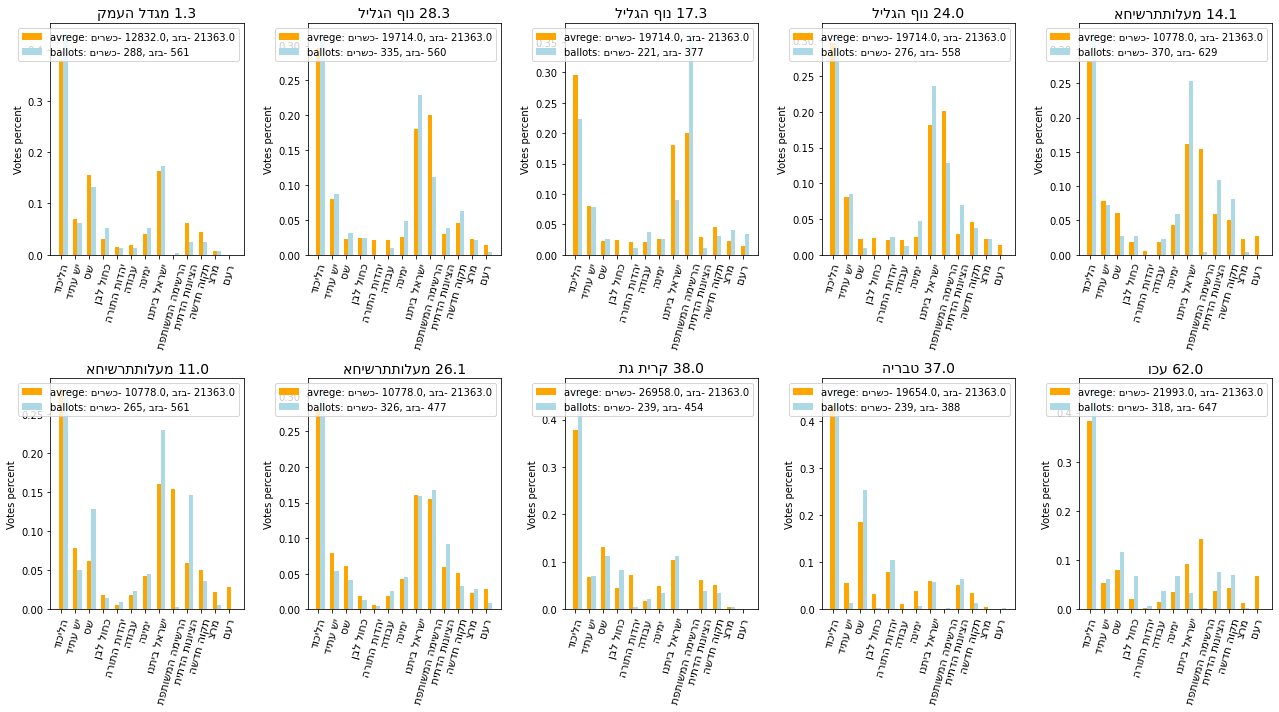

In [ ]:
TOP10FOR1GOF2021=pd.MultiIndex.from_frame(top_2021_ballots.iloc[:,0:2])

bar_plot_compare_to_avrege(ballots_2021_1f,averge_2021_for_f, TOP10FOR1GOF2021) 

2020

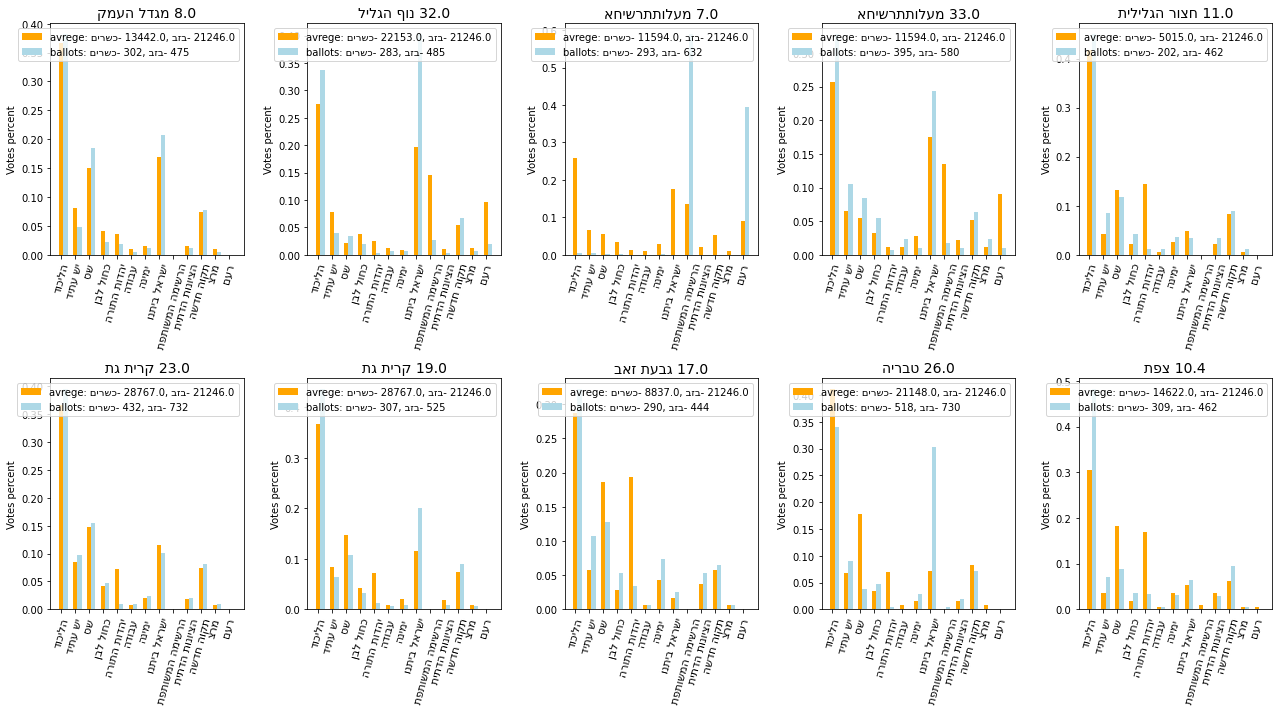

In [ ]:
TOP10FOR1GOF2020=pd.MultiIndex.from_frame(top_2020_ballots.iloc[:,0:2])

bar_plot_compare_to_avrege(ballots_2020_1f,averge_2020_for_f, TOP10FOR1GOF2020)


##1H-C

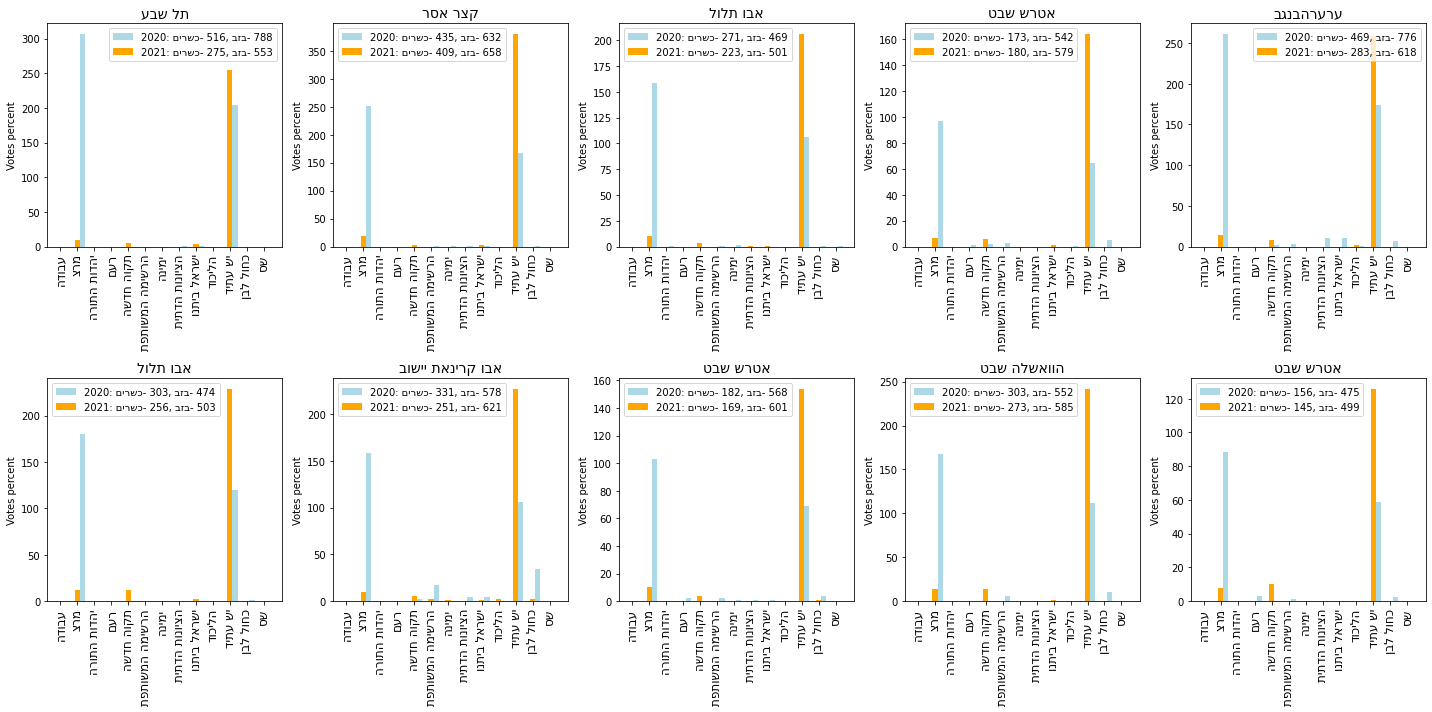

In [ ]:
bar_plot_percent(df_merged1, df_merged, df_ballot_top)

##1H-E

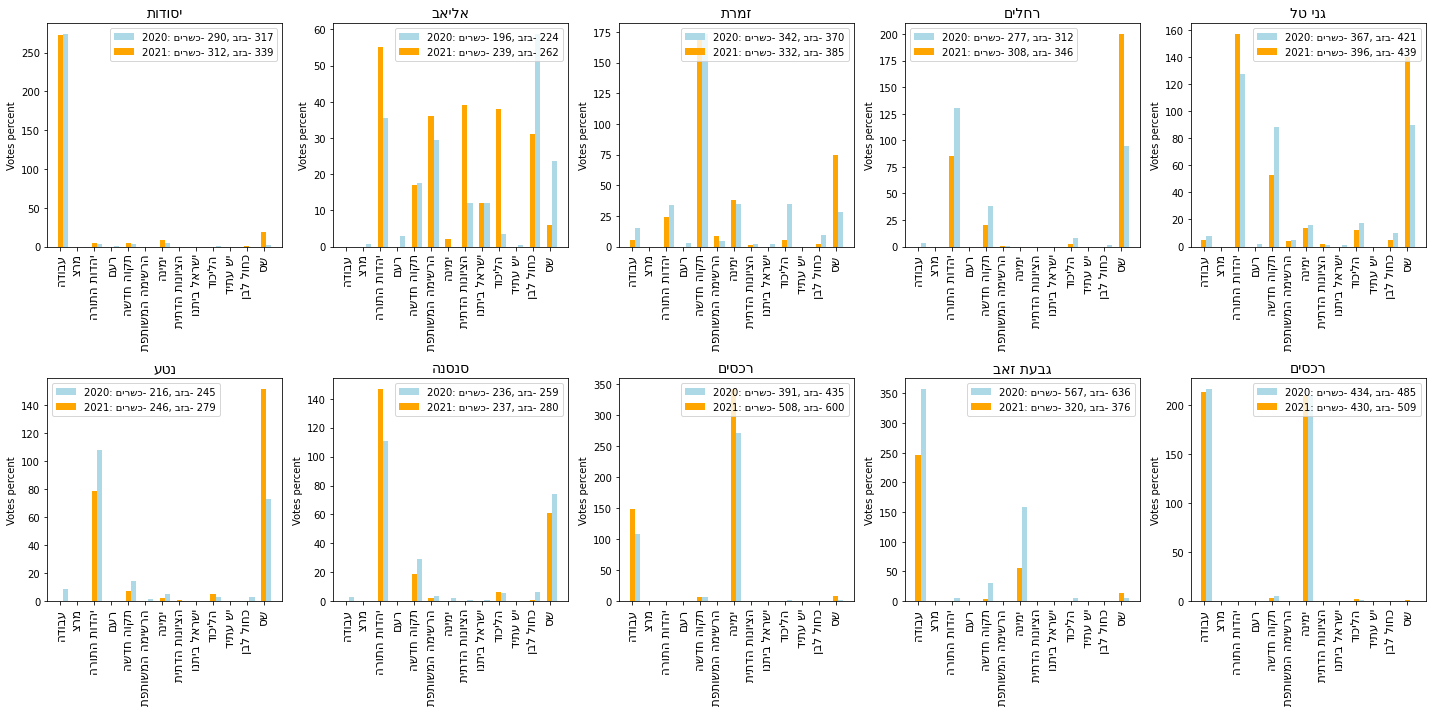

In [ ]:
bar_plot_percent(df_merged1, df_merged, top_10)

##1H-F

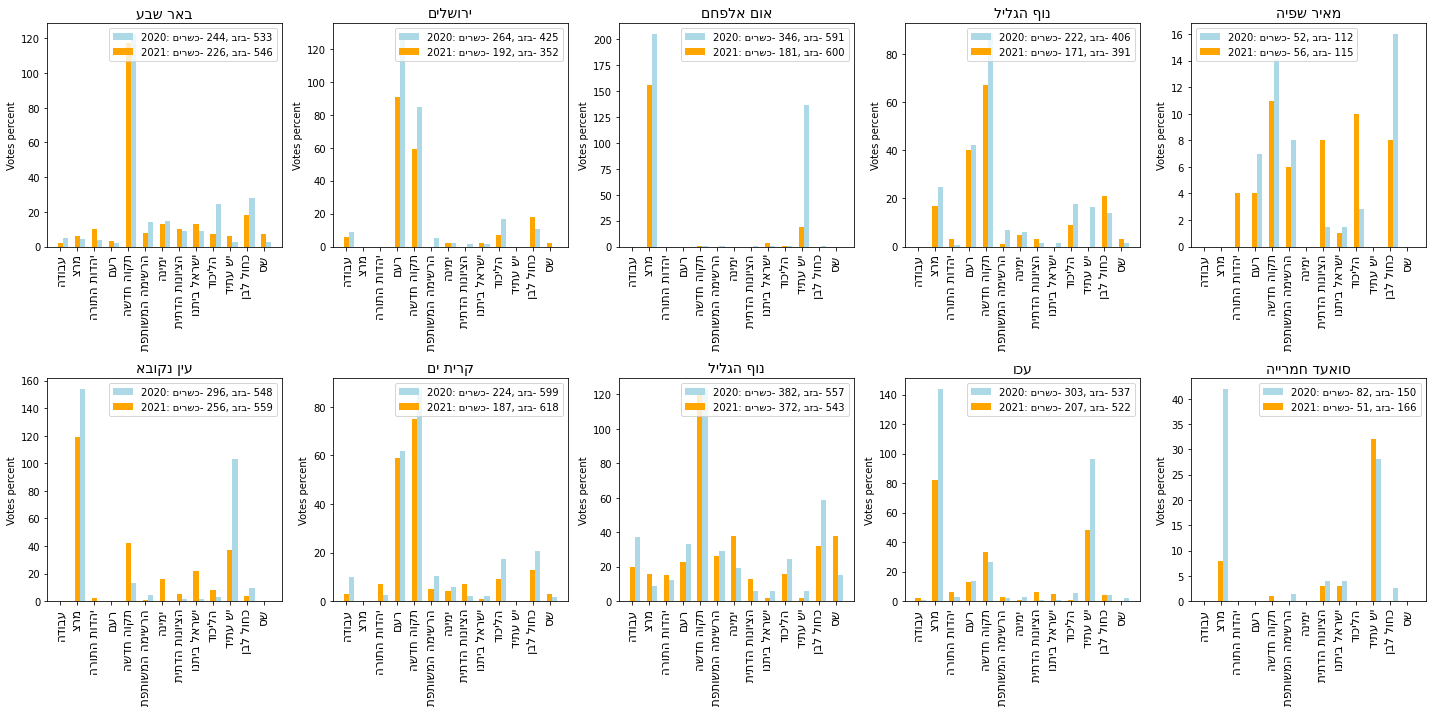

In [ ]:
bar_plot_percent(df_merged1, df_merged, top_10_illegal)

In [ ]:
##1H-B = Both 20&21

##2A

In [ ]:
sigma = df_q2.cov()
sigma

,יהדות התורה,הרשימה המשותפת,ימינה,ישראל ביתנו,הליכוד,כחול לבן,שס,עבודה,מרצ,תקוה חדשה,רעם,יש עתיד,הציונות הדתית
יהדות התורה,0.014894,-0.001075,-0.000594,-0.001320,-0.005114,-0.002286,0.004154,-0.001476,-0.001192,-0.001039,-0.000766,-0.004490,0.000304
הרשימה המשותפת,-0.001075,0.013691,-0.001299,-0.001332,-0.006204,-0.001951,-0.001864,-0.001013,-0.000366,-0.001239,0.007467,-0.003706,-0.001107
ימינה,-0.000594,-0.001299,0.004195,-0.000967,0.000017,-0.000726,-0.000523,-0.000249,-0.000476,0.000108,-0.000964,-0.001681,0.003158
ישראל ביתנו,-0.001320,-0.001332,-0.000967,0.006800,0.003367,-0.001078,-0.000312,-0.001182,-0.001056,0.000558,-0.001141,-0.001216,-0.001122
הליכוד,-0.005114,-0.006204,0.000017,0.003367,0.025330,-0.003599,0.004312,-0.004693,-0.004353,0.002850,-0.004492,-0.007232,-0.000186
כחול לבן,-0.002286,-0.001951,-0.000726,-0.001078,-0.003599,0.004173,-0.002732,0.002141,0.001820,-0.000134,-0.001475,0.007334,-0.001485
שס,0.004154,-0.001864,-0.000523,-0.000312,0.004312,-0.002732,0.007457,-0.002190,-0.001888,0.000125,-0.001364,-0.005557,0.000384
עבודה,-0.001476,-0.001013,-0.000249,-0.001182,-0.004693,0.002141,-0.002190,0.004028,0.002876,-0.000288,-0.000855,0.003860,-0.000959
מרצ,-0.001192,-0.000366,-0.000476,-0.001056,-0.004353,0.001820,-0.001888,0.002876,0.002946,-0.000390,-0.000473,0.003447,-0.000894
תקוה חדשה,-0.001039,-0.001239,0.000108,0.000558,0.002850,-0.000134,0.000125,-0.000288,-0.000390,0.000901,-0.000920,-0.000187,-0.000344


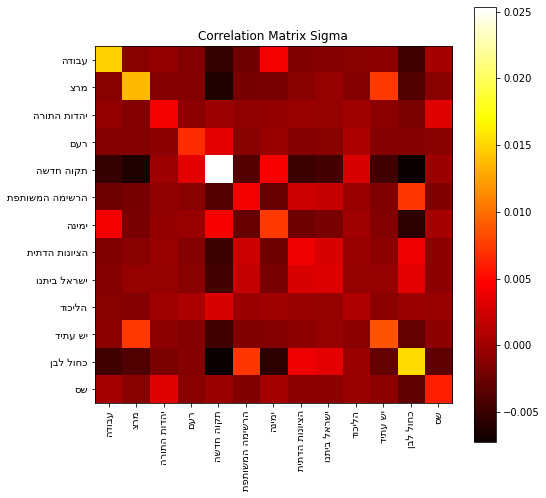

In [ ]:
# Heatmap of Sigma
rev_names = [name[::-1] for name in list(parties_2021A)]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(sigma, cmap=plt.get_cmap('hot'))
n = sigma.shape[0]  # get number of variables 
ax.set_xticks(np.arange(13))
ax.set_yticks(np.arange(13))
ax.set_xticklabels(rev_names)
ax.set_yticklabels(rev_names)
ax.set_title("Correlation Matrix Sigma")
plt.xticks(rotation=90)
cbar = ax.figure.colorbar(im,ax=ax)

##2B

In [ ]:
from scipy.spatial import distance
from numpy.linalg import inv

inverse_sigma = inv(sigma)

def mahalanobis(x=None, data=None, cov=None):
    x_mu = x - data
    #x_mu = x - np.mean(data)
    # inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, cov)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

עשר הקלפיות בעלות מרחק מהלנוביס הגדול ביותר בבחירות 2020

In [ ]:
df_2020_mahalanobis = ballots_2020_new.iloc[:,4:]
df_2020_mahalanobis['מהלנוביס'] = mahalanobis(x=ballots_2020_new.iloc[:,4:],data=mean_meatrix_2020_by_cities.iloc[:,3:],cov=inverse_sigma)
df_2020_mahalanobis = pd.concat([ballots_2020_new[['קלפי', 'סמל ישוב']], df_2020_mahalanobis], axis=1)
df_2020_mahalanobis = df_2020_mahalanobis.iloc[:,[0,1,15]]
top10_2020_mahalanobis = df_2020_mahalanobis.nlargest(10,'מהלנוביס')
# top10_2020_mahalanobis = pd.MultiIndex.from_frame(top10_2020_mahalanobis[['קלפי','סמל ישוב']])
top10_2020_mahalanobis

,קלפי,סמל ישוב,מהלנוביס
שם ישוב,,,
כאוכב אבו אלהיגא,2.0,505,0.060505
כאוכב אבו אלהיגא,4.0,505,0.020179
כאוכב אבו אלהיגא,1.0,505,0.005870
כאוכב אבו אלהיגא,3.0,505,0.005348
אבו עבדון שבט,1.0,958,0.000000
אבו קרינאת יישוב,1.0,1342,0.000000
אבטליון,1.0,1275,0.000000
אביאל,1.0,679,0.000000
אביבים,1.0,1115,0.000000


עשר הקלפיות בעלות מרחק מהלנוביס הגדול ביותר בבחירות 2021

In [ ]:
df_2021_mahalanobis = ballots_2021_new.iloc[:,4:]
df_2021_mahalanobis['מהלנוביס'] = mahalanobis(x=ballots_2021_new.iloc[:,4:],data=mean_meatrix_2021_by_cities.iloc[:,3:],cov=inverse_sigma)
df_2021_mahalanobis = pd.concat([ballots_2021_new[['קלפי', 'סמל ישוב']], df_2021_mahalanobis], axis=1)
df_2021_mahalanobis = df_2021_mahalanobis.iloc[:,[0,1,15]]
top10_2021_mahalanobis = df_2021_mahalanobis.nlargest(10,'מהלנוביס')
# top10_2021_mahalanobis = pd.MultiIndex.from_frame(top10_2021_mahalanobis[['קלפי','סמל ישוב']])
top10_2021_mahalanobis

,קלפי,סמל ישוב,מהלנוביס
שם ישוב,,,
ברכה,2.3,3710,9.369054
ברכה,2.2,3710,8.442544
טירת כרמל,6.1,2100,2.996889
ברכה,2.1,3710,0.245932
תפרח,1.0,709,0.176949
תפרח,2.0,709,0.141992
אבו עבדון שבט,1.0,958,0.000000
אבו קרינאת יישוב,1.0,1342,0.000000
אבטליון,1.0,1275,0.000000


עשר הקלפיות בעלות מרחק מהלנוביס הגדול ביותר בין בחירות 2020 לבחירות 2021

In [ ]:
!pip install nbconvert


In [ ]:
!jupyter nbconvert --to html test.ipynb